In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(seed=42) 

In [2]:
vsa_info = pd.read_csv(f"/ASD/ahsan_projects/braintypicality/dataset/VSADemographicsMar2023.csv")
vsa_info.rename(columns={"VSA demographics,CandID":"CandID"}, inplace=True)
vsa_info

,CandID,Identifiers,"VSA demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMV","VSA demographics,Age_at_visit_start","VSA demographics,Risk","VSA demographics,Sex","VSA demographics,candidate_race"
0,103831,UNC0234,No DSMIV ever administered,No DSMV ever administered,131.0,NaN,Male,white
1,105477,SEA4003,ASD-,ASD-,136.0,NaN,Female,white
2,105784,UNC0239,"ASD+ (V24, V36)",No DSMV ever administered,134.0,NaN,Male,NaN
3,107524,STL0200,"ASD+ (V24, V36, VSA-CVD)","ASD+ (V36, VSA-CVD)",135.0,HR,Male,0
4,108131,SEA1006,ASD+ (V24),ASD+ (V24),84.0,HR,Male,white
...,...,...,...,...,...,...,...,...
418,988903,SEA0163,"ASD+ (V24, V36, VSA)","ASD+ (V36, VSA)",103.0,HR,Male,NaN
419,989241,PHI4005,ASD-,ASD-,87.0,NaN,Male,white
420,992063,STL0003,ASD-,ASD-,137.0,HR,Female,NaN
421,995004,STL0249,ASD-,ASD-,128.0,HR,Female,0


In [3]:
asd_dx = pd.read_csv("/ASD/ahsan_projects/braintypicality/dataset/DX_IBIS_Sept22.csv",
                    usecols=lambda c: re.match( r"(.*ASD_Ever_DSMIV)|(Identifiers)|(CandID)", c))
asd_dx = asd_dx.replace(".", np.nan)
asd_dx

,Identifiers,"V06 demographics,ASD_Ever_DSMIV","V12 demographics,ASD_Ever_DSMIV","V18 demographics,ASD_Ever_DSMIV","V24 demographics,ASD_Ever_DSMIV","V36 demographics,ASD_Ever_DSMIV","V37Plus demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMIV","VSA-CVD demographics,ASD_Ever_DSMIV","VSA-Sleep demographics,ASD_Ever_DSMIV",...,"V15 demographics,ASD_Ever_DSMIV","V09 demographics,ASD_Ever_DSMIV","V12-CVD demographics,ASD_Ever_DSMIV","V24-CVD demographics,ASD_Ever_DSMIV","V06-CVD demographics,ASD_Ever_DSMIV","V18-CVD demographics,ASD_Ever_DSMIV","V9-CVD demographics,ASD_Ever_DSMIV","V09JA demographics,ASD_Ever_DSMIV","V15JA demographics,ASD_Ever_DSMIV","VSA-PR-IPSC demographics,ASD_Ever_DSMIV"
0,PHI0000,ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PHI0002,"ASD+ (V24, V36)","ASD+ (V24, V36)","ASD+ (V24, V36)","ASD+ (V24, V36)","ASD+ (V24, V36)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PHI0003,"ASD+ (V24, V36)","ASD+ (V24, V36)","ASD+ (V24, V36)","ASD+ (V24, V36)","ASD+ (V24, V36)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PHI0004,NaN,No DSMIV ever administered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PHI0005,NaN,"ASD+ (V24, V36)","ASD+ (V24, V36)","ASD+ (V24, V36)","ASD+ (V24, V36)","ASD+ (V24, V36)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,UNC7034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No DSMIV ever administered,NaN,NaN,NaN,NaN,NaN
1114,UNC7035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No DSMIV ever administered,NaN,NaN,NaN,NaN,NaN
1115,UNC7036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No DSMIV ever administered,NaN,NaN,NaN,NaN,NaN
1116,UNC7040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No DSMIV ever administered,NaN,NaN,NaN,NaN,NaN


In [4]:
prediction_columns = asd_dx.columns.difference(["CandID", "Identifiers"])
asd_dx[prediction_columns] = asd_dx[prediction_columns].fillna(axis=1, method="ffill").fillna(axis=1, method="bfill")
print(asd_dx.shape)
merge_columns = ["Identifiers",] + vsa_info.columns.difference(asd_dx.columns).tolist()
asd_dx = pd.merge(asd_dx, vsa_info[merge_columns], on="Identifiers")
print(asd_dx.shape)

(1118, 23)
(423, 29)


In [5]:
asd_positive_mask = asd_dx.drop(columns=merge_columns).apply(
    lambda col: col.str.contains('ASD+', regex=False
), axis=1).all(axis=1)
asd_positives = asd_dx[asd_positive_mask]
asd_positives.shape

(83, 29)

In [6]:
asd_negative_mask = (asd_dx.drop(columns=merge_columns) == "ASD-").all(1)
asd_negatives = asd_dx[asd_negative_mask]
asd_negatives.shape

(307, 29)

## Inliers are ASD -ves w/ ADOS filtering

In [7]:
ados_scores = pd.read_csv(f"/ASD/ahsan_projects/braintypicality/dataset/ADOS-IBIS1_2.csv",
                 usecols=lambda c: re.match( r"(.*severity_score_lookup)|(Identifiers)", c))
ados_scores

,Identifiers,"V24 ADOS_Derived,severity_score_lookup","V36 ADOS_Derived,severity_score_lookup","V37Plus ADOS_Derived,severity_score_lookup"
0,PHI0000,8,1,.
1,PHI0002,8,10,.
2,PHI0003,8,10,.
3,PHI0005,7,6,.
4,PHI0006,1,1,.
...,...,...,...,...
615,UNC1041,1,.,.
616,UNC1043,2,.,.
617,UNC1046,1,.,.
618,UNC1047,1,.,.


In [8]:
asd_positives[~asd_positives.Identifiers.isin(ados_scores.Identifiers)]

,Identifiers,"V06 demographics,ASD_Ever_DSMIV","V12 demographics,ASD_Ever_DSMIV","V18 demographics,ASD_Ever_DSMIV","V24 demographics,ASD_Ever_DSMIV","V36 demographics,ASD_Ever_DSMIV","V37Plus demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMIV","VSA-CVD demographics,ASD_Ever_DSMIV","VSA-Sleep demographics,ASD_Ever_DSMIV",...,"V9-CVD demographics,ASD_Ever_DSMIV","V09JA demographics,ASD_Ever_DSMIV","V15JA demographics,ASD_Ever_DSMIV","VSA-PR-IPSC demographics,ASD_Ever_DSMIV",CandID,"VSA demographics,ASD_Ever_DSMV","VSA demographics,Age_at_visit_start","VSA demographics,Risk","VSA demographics,Sex","VSA demographics,candidate_race"
196,SEA4001,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),110925,ASD-,116.0,NaN,Male,white
197,SEA4002,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),688878,ASD-,123.0,NaN,Female,white
293,STL4003,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),502237,ASD-,133.0,NaN,Male,more_than_one_race
296,STL4009,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),856429,ASD-,111.0,NaN,Male,white
300,STL4023,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),792433,ASD-,89.0,NaN,Male,white


In [9]:
ados_scores = ados_scores.replace(".", -1).dropna()
cols = ["V24 ADOS_Derived,severity_score_lookup", "V36 ADOS_Derived,severity_score_lookup", "V37Plus ADOS_Derived,severity_score_lookup"]
ados_scores[cols] = ados_scores[cols].astype(np.int64)
ados_scores = ados_scores[~(ados_scores[cols] == -1).all(axis=1)]
ados_scores

,Identifiers,"V24 ADOS_Derived,severity_score_lookup","V36 ADOS_Derived,severity_score_lookup","V37Plus ADOS_Derived,severity_score_lookup"
0,PHI0000,8,1,-1
1,PHI0002,8,10,-1
2,PHI0003,8,10,-1
3,PHI0005,7,6,-1
4,PHI0006,1,1,-1
...,...,...,...,...
615,UNC1041,1,-1,-1
616,UNC1043,2,-1,-1
617,UNC1046,1,-1,-1
618,UNC1047,1,-1,-1


In [10]:
ados_inlier_mask = (ados_scores.drop(columns="Identifiers") <= 2).all(1)
ados_inliers = ados_scores[ados_inlier_mask]
ados_outliers = ados_scores[~ados_inlier_mask]
ados_inliers

,Identifiers,"V24 ADOS_Derived,severity_score_lookup","V36 ADOS_Derived,severity_score_lookup","V37Plus ADOS_Derived,severity_score_lookup"
4,PHI0006,1,1,-1
5,PHI0007,2,2,-1
9,PHI0015,2,-1,-1
14,PHI0045,1,2,-1
15,PHI0047,2,-1,-1
...,...,...,...,...
615,UNC1041,1,-1,-1
616,UNC1043,2,-1,-1
617,UNC1046,1,-1,-1
618,UNC1047,1,-1,-1


#### 5 ASDs dont show up in ADOS scores at all ... 

In [11]:
asd_positives[~asd_positives.Identifiers.isin(ados_scores.Identifiers)]

,Identifiers,"V06 demographics,ASD_Ever_DSMIV","V12 demographics,ASD_Ever_DSMIV","V18 demographics,ASD_Ever_DSMIV","V24 demographics,ASD_Ever_DSMIV","V36 demographics,ASD_Ever_DSMIV","V37Plus demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMIV","VSA-CVD demographics,ASD_Ever_DSMIV","VSA-Sleep demographics,ASD_Ever_DSMIV",...,"V9-CVD demographics,ASD_Ever_DSMIV","V09JA demographics,ASD_Ever_DSMIV","V15JA demographics,ASD_Ever_DSMIV","VSA-PR-IPSC demographics,ASD_Ever_DSMIV",CandID,"VSA demographics,ASD_Ever_DSMV","VSA demographics,Age_at_visit_start","VSA demographics,Risk","VSA demographics,Sex","VSA demographics,candidate_race"
196,SEA4001,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),110925,ASD-,116.0,NaN,Male,white
197,SEA4002,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),688878,ASD-,123.0,NaN,Female,white
293,STL4003,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),502237,ASD-,133.0,NaN,Male,more_than_one_race
296,STL4009,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),856429,ASD-,111.0,NaN,Male,white
300,STL4023,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),792433,ASD-,89.0,NaN,Male,white


#### 10 show up in ADOS inliers!

In [12]:
pd.merge(asd_positives, ados_inliers, on="Identifiers")

,Identifiers,"V06 demographics,ASD_Ever_DSMIV","V12 demographics,ASD_Ever_DSMIV","V18 demographics,ASD_Ever_DSMIV","V24 demographics,ASD_Ever_DSMIV","V36 demographics,ASD_Ever_DSMIV","V37Plus demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMIV","VSA-CVD demographics,ASD_Ever_DSMIV","VSA-Sleep demographics,ASD_Ever_DSMIV",...,"VSA-PR-IPSC demographics,ASD_Ever_DSMIV",CandID,"VSA demographics,ASD_Ever_DSMV","VSA demographics,Age_at_visit_start","VSA demographics,Risk","VSA demographics,Sex","VSA demographics,candidate_race","V24 ADOS_Derived,severity_score_lookup","V36 ADOS_Derived,severity_score_lookup","V37Plus ADOS_Derived,severity_score_lookup"
0,PHI0091,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),868281,ASD+ (VSA),128.0,LR,Female,NaN,1,-1,-1
1,SEA0150,ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),...,ASD+ (V36),830319,ASD-,115.0,HR,Female,NaN,2,1,-1
2,STL0030,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),859030,ASD+ (VSA),136.0,HR,Male,NaN,1,-1,-1
3,STL0080,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),942002,ASD-,127.0,HR,Male,NaN,1,-1,-1
4,STL1005,ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),...,ASD+ (VSA-CVD),570637,ASD-,94.0,HR,Female,asian,2,-1,-1
5,UNC0050,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),845807,ASD+ (VSA),134.0,HR,Female,NaN,1,-1,-1
6,UNC0059,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),515353,ASD+ (VSA),131.0,HR,Female,NaN,2,1,-1
7,UNC0106,"ASD+ (V24, VSA)","ASD+ (V24, VSA)","ASD+ (V24, VSA)","ASD+ (V24, VSA)","ASD+ (V24, VSA)","ASD+ (V24, VSA)","ASD+ (V24, VSA)","ASD+ (V24, VSA)","ASD+ (V24, VSA)",...,"ASD+ (V24, VSA)",983222,ASD+ (VSA),122.0,HR,Female,NaN,1,1,-1
8,UNC0195,ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),ASD+ (V24),...,ASD+ (V24),963992,ASD-,134.0,HR,Male,0,2,1,-1
9,UNC0240,ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),...,ASD+ (V36),483234,ASD-,128.0,NaN,Male,NaN,2,1,-1


#### So 15 ASDs, dont show up in ADOS *Outliers*

In [13]:
asd_positives[~asd_positives.Identifiers.isin(ados_outliers.Identifiers)]

,Identifiers,"V06 demographics,ASD_Ever_DSMIV","V12 demographics,ASD_Ever_DSMIV","V18 demographics,ASD_Ever_DSMIV","V24 demographics,ASD_Ever_DSMIV","V36 demographics,ASD_Ever_DSMIV","V37Plus demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMIV","VSA-CVD demographics,ASD_Ever_DSMIV","VSA-Sleep demographics,ASD_Ever_DSMIV",...,"V9-CVD demographics,ASD_Ever_DSMIV","V09JA demographics,ASD_Ever_DSMIV","V15JA demographics,ASD_Ever_DSMIV","VSA-PR-IPSC demographics,ASD_Ever_DSMIV",CandID,"VSA demographics,ASD_Ever_DSMV","VSA demographics,Age_at_visit_start","VSA demographics,Risk","VSA demographics,Sex","VSA demographics,candidate_race"
16,PHI0091,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),868281,ASD+ (VSA),128.0,LR,Female,NaN
131,SEA0150,ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),...,ASD+ (V36),ASD+ (V36),ASD+ (V36),ASD+ (V36),830319,ASD-,115.0,HR,Female,NaN
196,SEA4001,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),110925,ASD-,116.0,NaN,Male,white
197,SEA4002,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),688878,ASD-,123.0,NaN,Female,white
216,STL0030,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),859030,ASD+ (VSA),136.0,HR,Male,NaN
229,STL0080,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),942002,ASD-,127.0,HR,Male,NaN
278,STL1005,ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),...,ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),ASD+ (VSA-CVD),570637,ASD-,94.0,HR,Female,asian
293,STL4003,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),502237,ASD-,133.0,NaN,Male,more_than_one_race
296,STL4009,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),856429,ASD-,111.0,NaN,Male,white
300,STL4023,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),...,ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),ASD+ (VSA),792433,ASD-,89.0,NaN,Male,white


In [14]:
asd_neg_ados_negatives = pd.merge(asd_negatives, ados_inliers, on="Identifiers").drop_duplicates(subset="CandID")
asd_neg_ados_negatives.shape

(226, 32)

In [15]:
asd_neg_ados_atypical = pd.merge(asd_negatives, ados_outliers, on="Identifiers").drop_duplicates(subset="CandID")
asd_neg_ados_atypical.shape

(48, 32)

In [16]:
# ##### Outdated CSV ##########
# raw_info = pd.read_csv(f"/ASD/ahsan_projects/braintypicality/dataset/IBIS_V06_CSF_All.csv", usecols=[
#     "Identifiers", "CandID","Age_at_visit_start","Project","Status","ASD_DX",
#     "ASD_DX_group","group ID","Identifiers","Cohort","Risk"])
# raw_info.head()

# raw_info[["ASD_DX_group", "Risk"]].value_counts()

# outliers = raw_info.query("ASD_DX_group !='TYPICAL' & Risk=='HR'")["CandID"].drop_duplicates()
# outliers.shape

# lr_typicals = raw_info.query("ASD_DX_group=='TYPICAL' & Risk=='LR'")
# lr_typicals.shape

# # inliers = pd.merge(lr_typicals, asd_ados_negatives, on="CandID")["CandID"].drop_duplicates()
# # inliers.shape
##############################

#### INTERSECT WITH SUBJECTS THAT WE ACTUALLY HAVE ON DISK !

In [17]:
import glob,os
R = re.compile(r"stx_(\d*)_VSA_*")

t1_paths = glob.glob("/ASD/Autism/IBIS/Proc_Data/*/VSA*/mri/registered_stx/sMRI/*T1w.nrrd")
t2_paths = glob.glob("/ASD/Autism/IBIS/Proc_Data/*/VSA*/mri/registered_stx/sMRI/*T2w.nrrd")

In [18]:
t1_paths[0]

'/ASD/Autism/IBIS/Proc_Data/107524/VSA-CVD/mri/registered_stx/sMRI/stx_107524_VSA-CVD_T1w.nrrd'

In [19]:
import ants

t1_img = ants.image_read(t1_paths[0])
t1_img

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (197, 233, 189)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-196.0, -232.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

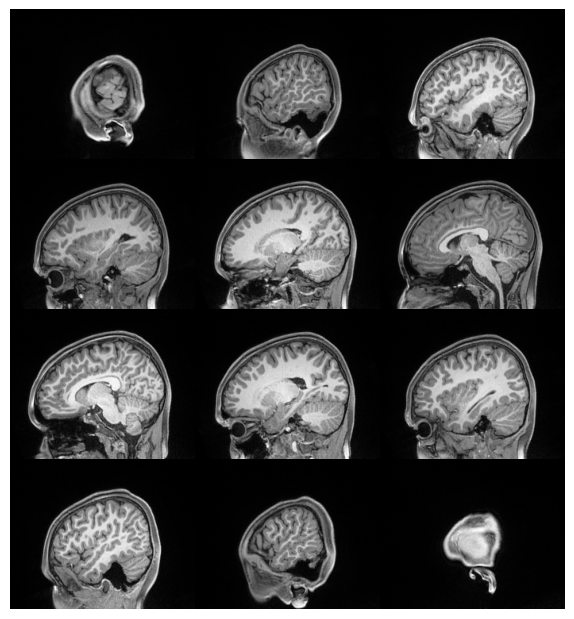

In [20]:
t1_img.plot()

#### Grabbing VSA* - Adds post-covid scans to list

In [21]:
import glob,os,re
R = re.compile(r"stx_(\d*)_VSA_*")

procd_paths = glob.glob("/DATA/Users/amahmood/braintyp/processed_v2/IBIS*.nii.gz")
len(procd_paths)

326

In [22]:
# %ls /DATA/Users/amahmood/braintyp/processed_v2/

In [23]:
procd_paths[-1]

'/DATA/Users/amahmood/braintyp/processed_v2/IBIS999434.nii.gz'

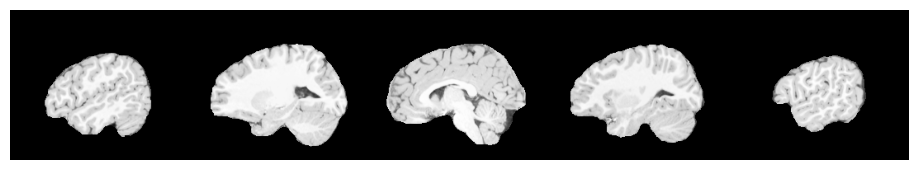

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-188.0, -224.0, 4.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [24]:
import ants

t1_img, t2_img = ants.image_read(procd_paths[0]).split_channels()
t1_img.plot(nslices=5)
t1_img

In [25]:
R = re.compile(r"(\d*).nii.gz")
_fn = lambda x: int(R.search(x).group(1))
subject_ids = set(map(_fn, procd_paths))
len(subject_ids)

326

In [26]:
ondisk_negatives = asd_neg_ados_negatives["CandID"].isin(subject_ids).sum()
ondisk_negatives

188

In [27]:
ondisk_atypicals = asd_neg_ados_atypical["CandID"].isin(subject_ids).sum()
ondisk_atypicals

38

In [28]:
inliers = asd_neg_ados_negatives[asd_neg_ados_negatives.CandID.isin(subject_ids)]
inliers['VSA demographics,Risk'].value_counts()

HR    106
LR     82
Name: VSA demographics,Risk, dtype: int64

In [29]:
inliers['VSA demographics,Sex'].value_counts()

Male      105
Female     83
Name: VSA demographics,Sex, dtype: int64

In [30]:
low_risk_inlier_keys = inliers[inliers["VSA demographics,Risk"]=="LR"]["CandID"]
high_risk_inlier_keys = inliers[inliers["VSA demographics,Risk"]=="HR"]["CandID"]

In [31]:
outlier_keys = asd_positives["CandID"][asd_positives["CandID"].isin(subject_ids)]
outlier_keys.shape

(65,)

In [32]:
atypicals = asd_neg_ados_atypical[asd_neg_ados_atypical.CandID.isin(subject_ids)]
atypical_keys = atypicals["CandID"]
atypicals.shape, atypicals["VSA demographics,Risk"].value_counts()

((38, 32),
 HR    27
 LR    11
 Name: VSA demographics,Risk, dtype: int64)

In [33]:
ds_controls = pd.read_csv("ds-sa_inlier_keys.txt", header=None, names=["CandID"]).astype(np.int64)
print("Starting num:", len(ds_controls))

Starting num: 78


In [34]:
ds_controls

,CandID
0,114640
1,119906
2,171870
3,180215
4,186588
...,...
73,631202
74,656320
75,728124
76,778775


In [35]:
ds_merged = pd.merge(ds_controls, vsa_info, on="CandID", how="inner")
ds_merged

,CandID,Identifiers,"VSA demographics,ASD_Ever_DSMIV","VSA demographics,ASD_Ever_DSMV","VSA demographics,Age_at_visit_start","VSA demographics,Risk","VSA demographics,Sex","VSA demographics,candidate_race"
0,114640,SEA0102,ASD-,ASD-,120.0,LR,Male,NaN
1,119906,UNC0104,ASD-,ASD-,118.0,LR,Male,white
2,171870,STL0234,ASD-,ASD-,107.0,LR,Female,NaN
3,180215,STL0257,ASD-,ASD-,94.0,LR,Male,NaN
4,186588,SEA0258,ASD-,ASD-,97.0,LR,Male,NaN
...,...,...,...,...,...,...,...,...
73,631202,UNC0133,ASD-,No DSMV ever administered,143.0,LR,Female,white{@}asian{@}more_than_one_race
74,656320,SEA0119,ASD-,ASD-,136.0,LR,Female,0
75,728124,SEA0183,ASD-,ASD-,129.0,LR,Female,0
76,778775,UNC0041,ASD-,ASD-,151.0,LR,Female,0


In [36]:
78-ds_merged.Identifiers.isin(ados_scores.Identifiers).sum()

5

In [37]:
ds_merged["VSA demographics,Risk"].value_counts()

LR    78
Name: VSA demographics,Risk, dtype: int64

In [38]:
ds_merged["VSA demographics,ASD_Ever_DSMV"].value_counts()

ASD-                         66
No DSMV ever administered     9
ASD+ (VSA)                    2
ASD+ (V36, VSA)               1
Name: VSA demographics,ASD_Ever_DSMV, dtype: int64

In [39]:
5 + 3 + 9

17

### 5 DS controls have ASD ??

In [40]:
ds_controls.CandID.isin(asd_positives.CandID).sum()

5

In [41]:
ds_neg_ados_neg = ds_controls.CandID.isin(asd_neg_ados_negatives.CandID).sum()
ds_neg_ados_atypical = ds_controls.CandID.isin(asd_neg_ados_atypical.CandID).sum()
ds_neg_asd = ds_controls.CandID.isin(asd_positives.CandID).sum()

ds_neg_ados_neg, ds_neg_ados_atypical, ds_neg_asd, ds_neg_ados_neg+ ds_neg_ados_atypical+ ds_neg_asd

(59, 9, 5, 73)

In [42]:
ds_controls = pd.merge(ds_controls, asd_neg_ados_negatives, on="CandID").drop_duplicates()
ds_control_keys = ds_controls["CandID"]
ds_control_keys.shape

(59,)

In [43]:
combined_inlier_keys = pd.concat([low_risk_inlier_keys, ds_control_keys]).drop_duplicates()
combined_inlier_keys.shape

(82,)

### Low-Risk Inliers and ASD as Outliers

In [58]:
ibis_inlier_keys = "IBIS" + combined_inlier_keys.astype(str)
ibis_asd_keys = "IBIS" + outlier_keys.astype(str)

In [59]:
ds_pos = pd.read_csv("ibis-ds-sa_keys.txt", header=None)
ds_pos = set([k.item() for k in ds_pos.values])
ibis_non_ds_asd_keys = ibis_asd_keys[~ibis_asd_keys.isin(ds_pos)]
ibis_non_ds_asd_keys

0      IBIS389101
3      IBIS929204
4      IBIS809318
6      IBIS463809
8      IBIS230955
          ...    
351    IBIS983222
352    IBIS903923
355    IBIS174982
378    IBIS963992
385    IBIS241033
Name: CandID, Length: 61, dtype: object

In [60]:
set(ibis_asd_keys).intersection(ds_pos)

{'IBIS110925', 'IBIS502237', 'IBIS688878', 'IBIS792433'}

In [61]:
ibis_inlier_keys.to_csv("ibis-inlier_keys.txt", header=None, index=None)
ibis_asd_keys.to_csv("ibis-asd_keys.txt", header=None, index=None)
ibis_non_ds_asd_keys.to_csv("ibis-non-ds-asd_keys.txt", header=None, index=None)

### High Risk Inliers

In [62]:
ibis_hr_keys = "IBIS" + high_risk_inlier_keys.astype(str)
ibis_hr_keys.to_csv("ibis-hr-inliers_keys.txt", header=None, index=None)

### ASD-ve but ADOS Atypical

In [63]:
ibis_atypical_keys = "IBIS" + atypical_keys.astype(str)
ibis_atypical_keys.to_csv("ibis-atypical_keys.txt", header=None, index=None)

In [64]:
assert len(ibis_inlier_keys) + len(ibis_hr_keys) + len(ibis_atypical_keys) == ondisk_negatives + ondisk_atypicals
len(ibis_inlier_keys), len(ibis_hr_keys), len(ibis_non_ds_asd_keys), len(ibis_atypical_keys)

(82, 106, 61, 38)

In [65]:
len(ibis_inlier_keys)+len(ibis_hr_keys)+len(ibis_non_ds_asd_keys)+len(ibis_atypical_keys)

287

In [68]:
len(set(ibis_inlier_keys).union(set(ibis_hr_keys)).union(set(ibis_asd_keys)).union(set(ibis_atypical_keys)).union(set(ibis_non_ds_asd_keys)))

291

## Optional: Keys for finetuning

In [53]:
val_size = int(0.1 * ibis_inlier_keys.shape[0])
np.random.seed(42)

# "Clean" implies low risk typicals + controls
ibis_clean_inliers_shuffled = ibis_inlier_keys.sample(frac=1, random_state=42)
ibis_finetune_val = ibis_clean_inliers_shuffled.iloc[:val_size]
ibis_finetune_train = ibis_clean_inliers_shuffled.iloc[val_size:]

# HR Typicals become test set
ibis_finetune_test = ibis_hr_keys

ibis_finetune_train.shape, ibis_finetune_val.shape, ibis_finetune_test.shape

((74,), (8,), (106,))

In [54]:
# ibis_finetune_train, ibis_finetune_val, ibis_finetune_test

In [55]:
# ibis_finetune_train.to_csv("ibis-finetune-train_keys.txt", header=None, index=None)
# ibis_finetune_val.to_csv("ibis-finetune-val_keys.txt", header=None, index=None)
# ibis_finetune_test.to_csv("ibis-finetune-test_keys.txt", header=None, index=None)

### Only using HR Typicals for finetuning
>### IBIS controls will be val and test set

In [56]:
ibis_finetune_hr_only = "IBIS" + high_risk_inlier_keys.astype(str)
val_size = int(0.1 * high_risk_inlier_keys.shape[0])

# Using the same number as before for validation
ibis_inlier_val_keys = ibis_inlier_keys.iloc[:val_size]
ibis_inlier_test_keys = ibis_inlier_val_keys

ibis_finetune_hr_only.shape, ibis_inlier_val_keys.shape

((106,), (10,))

In [57]:
# ibis_finetune_hr_only.to_csv("ibis-finetune-hr-train_keys.txt", header=None, index=None)
# ibis_inlier_val_keys.to_csv("ibis-finetune-hr-val_keys.txt", header=None, index=None)
# ibis_inlier_test_keys.to_csv("ibis-finetune-hr-test_keys.txt", header=None, index=None)